In [4]:
import urllib.request
import json

URL = 'http://hubblesite.org/api/v3/images?page={0}'


def image_from_url(page=1):
    """
    Same as for news releases, the images are sorted by the publication date and time (last goes first).
    :param page: 
    :return: 
    id	        Internal key to identify the image. It can be used to gather more information using the details API call (below).
    name	    Name given to the Image
    news_name	Legacy name given to this image in a news release. Usually is 'a', 'b', 'c', ...
    collection	Collection name the image belongs to.
    mission	    Space Telescope or telescope website, the image belongs to. It is usually 'hubble', 'james_webb', etc.
    """
    with urllib.request.urlopen(URL.format(page)) as url:
        data = json.loads(url.read().decode())
    return data

URL_IMAGE = 'http://hubblesite.org/api/v3/image/{}'


def image_details_from_url(image):
    """
    :param image ID: 
    :return:
    name	Title given to the Image
    description	Image description text, caption
    credits	Image's credits and acknowledgments
    news_name	Legacy name given to this Image in a news release. Usually is 'a', 'b', 'c', ...
    mission	Space Telescope or telescope website, the Image belongs to. It is usually 'hubble', 'james_webb', etc.
    collection	Collection name the Image belongs to.
    image_files	Array of downloadable image files. It could be images, PDFs, ZIP files containing images, etc. Each element containing:
        file_url: HTTPS URL of the image file.
        file_size: Size of the file.
        width: Width of the image, if it is a common image file format
        height: Height of the image, if it is an image file
    """
    with urllib.request.urlopen(URL_IMAGE.format(image)) as url:
        data = json.loads(url.read().decode())
        return data


In [58]:
import subprocess
from pprint import pprint

def download_image(image_dict):
    iid = image_dict['id']
    meta = image_details_from_url(iid)
    meta['id'] = iid
    with open('hubble/meta/{}.json'.format(iid), 'w', encoding='utf8') as mf:
        json.dump(meta, mf)
    try:
        file_meta = next(im for im in meta['image_files'] if im['file_url'].endswith('jpg'))
    except:
        return

        
    #print(subprocess.check_output('wget -O hubble/images/{}.jpg {}'.format(iid, file_meta['file_url']), shell=True))

In [50]:
from tqdm import tqdm_notebook as tqdm
def download_page(page_num):
    print('Getting page {}'.format(page_num))
    images = image_from_url(page_num)
    list(map(download_image, tqdm(images)))

In [55]:
for pn in range(1, 10000):
    download_page(pn)

Getting page 1



Getting page 2


KeyboardInterrupt: 

In [57]:
! ls -la hubble/meta/ | wc -l

4153


In [ ]:
download_page('all')

Getting page all


In [9]:
det = image_details_from_url(images[0]['id'])

In [12]:
file_meta = next(im for im in det['image_files'] if im['file_url'].endswith('jpg'))

In [13]:
file_meta

{'file_url': 'https://media.stsci.edu/uploads/image_file/image_attachment/30990/STScI-H-p1846a_f3840x2160.jpg',
 'file_size': 2568785,
 'width': 3840,
 'height': 2160}

b''

In [30]:
! mkdir hubble/meta

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mike/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['det']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
im = imread('hubble/4241.jpg')

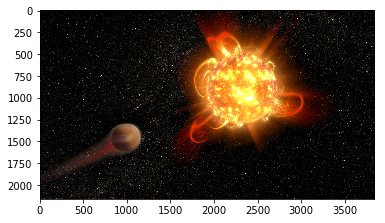

In [28]:
imshow(im)